In [ ]:
# 1. Load & Prepare Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense




In [ ]:
df=pd.read_csv("/content/Sample - Superstore.csv", encoding='windows-1252')

In [ ]:
# Convert to datetime and sort
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values('Order Date')

# Monthly aggregation
monthly_sales = df.resample('M', on='Order Date').sum()['Sales']

<ipython-input-4-d56a72384e8c>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date').sum()['Sales']


In [ ]:
# 2. Scale and Prepare Time Series Sequences
scaler = MinMaxScaler()
scaled_sales = scaler.fit_transform(monthly_sales.values.reshape(-1, 1))

def create_sequences(data, time_steps=12):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 12
X, y = create_sequences(scaled_sales, time_steps)

# Reshape for LSTM [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
# 3. Train-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 4. Build and Train LSTM Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1795
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1296 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1173
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1142 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1273
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0968
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0761
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0681
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0500
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0298 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0388 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0411
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0362
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0358 
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0318
Epoch 16/50
4/4 ━━━━━━━━━━━━━

In [ ]:
# 5. Make Predictions
y_pred = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


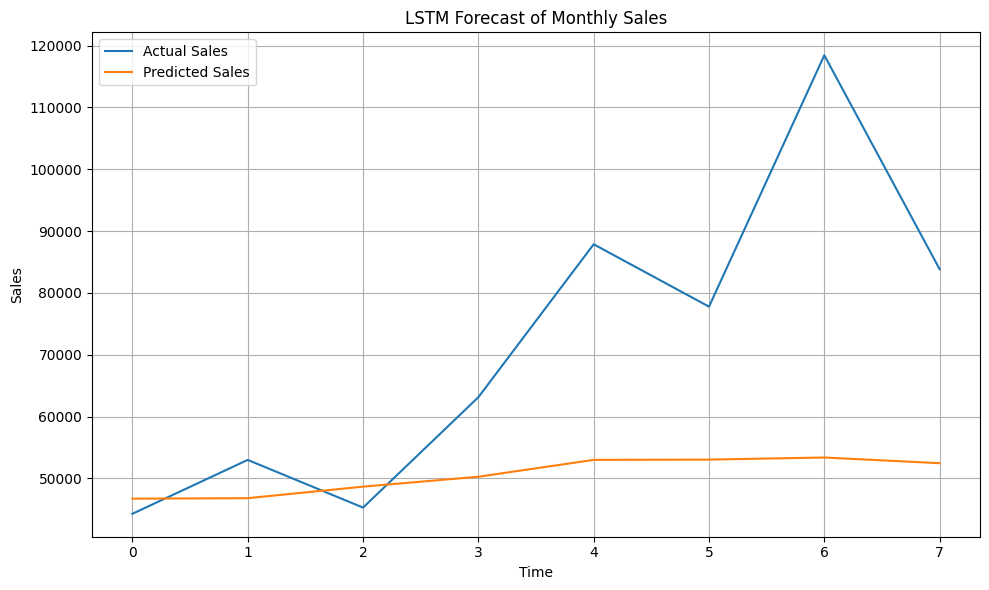

In [ ]:

# Inverse scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# 6. Plot Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(y_test_inv, label='Actual Sales')
plt.plot(y_pred_inv, label='Predicted Sales')
plt.title('LSTM Forecast of Monthly Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1/50


<ipython-input-9-2e18a596e2a6>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample('M', on='Order Date')[['Sales', 'Profit', 'Discount', 'Quantity']].sum()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0839
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0372
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0412
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0327
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0296
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0382
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0381
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0401
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0343
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0349
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0312
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0379
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0338
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0349
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0317
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/

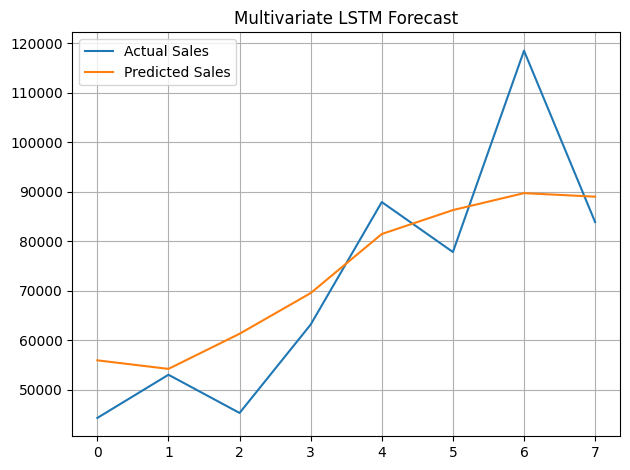

In [ ]:
# === Setup ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# === Load & Aggregate ===
df = pd.read_csv("Sample - Superstore.csv", encoding='windows-1252')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values('Order Date')
monthly_df = df.resample('M', on='Order Date')[['Sales', 'Profit', 'Discount', 'Quantity']].sum()

# === Scale ===
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(monthly_df)

# === Sequence Prep ===
def create_multivariate_sequences(data, time_steps=12):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps, 0])  # Predicting Sales
    return np.array(X), np.array(y)

X, y = create_multivariate_sequences(scaled_data)
X_train, X_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):]
y_train, y_test = y[:int(0.8*len(y))], y[int(0.8*len(y)):]

# === LSTM Model ===
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

# === Predict & Inverse ===
y_pred = model.predict(X_test)
sales_scaler = MinMaxScaler()
sales_scaler.min_, sales_scaler.scale_ = scaler.min_[0], scaler.scale_[0]
y_pred_inv = sales_scaler.inverse_transform(y_pred)
y_test_inv = sales_scaler.inverse_transform(y_test.reshape(-1, 1))

# === Plot ===
plt.plot(y_test_inv, label='Actual Sales')
plt.plot(y_pred_inv, label='Predicted Sales')
plt.title("Multivariate LSTM Forecast")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
